In [1]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
os.getcwd()

'/home/kinimv/code/lsst/photo-z'

In [4]:
df = pd.read_csv('/home/kinimv/code/lsst/photo-z/grid_stddevs.dat', sep='\s+', header=None, skiprows=13)
df.columns = ['u','g','r','i','z','y','bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9']
#bins are [0.45,0.75,1.05,1.35,1.65,1.95,2.25,2.55,2.85]
# z_bin_full_width = 0.30 
# z_bin_half_width = 0.15 

In [6]:
df.head()

,u,g,r,i,z,y,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9
0,26.09,27.38,27.53,26.83,26.05,24.86,0.0242,0.0162,0.0169,0.0259,0.0315,0.0318,0.0306,0.0471,0.0863
1,23.15,27.38,27.53,26.83,26.05,24.86,0.0274,0.0159,0.0173,0.0285,0.0467,0.0600,0.0311,0.0466,0.0731
2,23.90,27.38,27.53,26.83,26.05,24.86,0.0266,0.0163,0.0174,0.0283,0.0472,0.0625,0.0356,0.0517,0.0688
3,25.15,27.38,27.53,26.83,26.05,24.86,0.0257,0.0161,0.0175,0.0272,0.0396,0.0393,0.0306,0.0469,0.0821
4,26.02,27.38,27.53,26.83,26.05,24.86,0.0248,0.0162,0.0175,0.0260,0.0321,0.0310,0.0293,0.0474,0.0665


In [7]:
df.tail()

,u,g,r,i,z,y,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9
150,26.09,27.38,27.53,25.58,26.05,24.86,0.0285,0.0208,0.0248,0.0321,0.0352,0.0429,0.0423,0.0719,0.0976
151,26.09,27.38,27.53,26.83,24.80,23.61,0.0249,0.0188,0.0253,0.0404,0.0355,0.0353,0.0418,0.0842,0.4681
152,26.09,27.38,27.53,26.83,24.80,24.86,0.0249,0.0184,0.0219,0.0352,0.0336,0.0336,0.0383,0.0746,0.4560
153,26.09,27.38,27.53,26.83,26.05,23.61,0.0248,0.0167,0.0200,0.0334,0.0335,0.0321,0.0326,0.0545,0.0785
154,26.09,27.38,27.53,26.83,26.05,24.86,0.0239,0.0160,0.0176,0.0248,0.0311,0.0316,0.0263,0.0424,0.0709


In [8]:
#Trying to linear fit all filters
reg = linear_model.LinearRegression()
#reg.fit(df3[['u','g','r','i','z','y']],df.test1)
reg.fit(df.iloc[0:][['u','g','r','i','z','y']],df.bin1.iloc[0:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [-0.00152768 -0.00400098 -0.0068155  -0.00260573  0.00097694  0.00065087]
Intercept:  0.3895822043491475


In [13]:
reg.predict([[25.90,27.26,27.48,26.78,26.00,25.08]])

array([0.02560146])

### Counting other bands as unchanged

In [45]:
reg2 = linear_model.LinearRegression()
reg2.fit(df.iloc[0:][['u']],df.bin1.iloc[0:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
reg2.predict([[25.90]])

array([0.02974796])

## Seaborn for visualizations

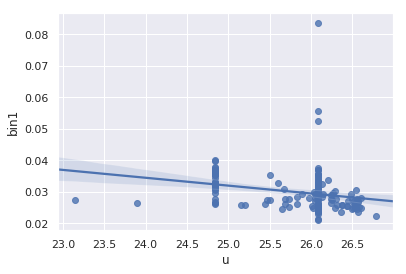

In [20]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(color_codes=True)
sns.regplot(x="u", y="bin1", data=df);

Is linear regression even appropriate? Let's try residplot(), where we expect values to be randomly distributed around 0. It fits and removes a simple linear regression and then plots the residual values for each observation.

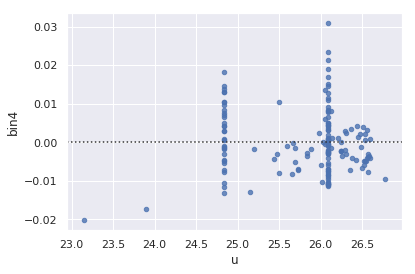

In [39]:
sns.residplot(x="u", y="bin4", data=df,scatter_kws={"s": 20});

In this bin as in many others, there are places that take discrete values. The simple scatterplot produced by this kind of dataset is not optimal:
Experimenting with different options to reedy this:

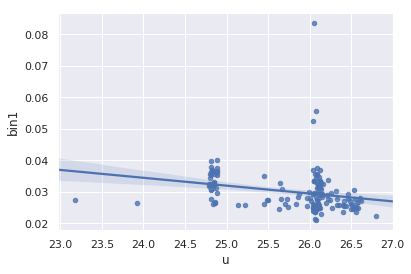

In [41]:
#Adding a random jitter
sns.regplot(x="u", y="bin1", data=df, x_jitter=.05,scatter_kws={"s": 20});

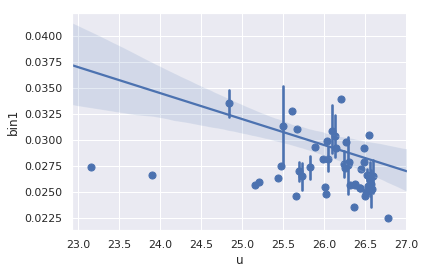

In [24]:
#Collapsing the discrete observations into a bin
sns.regplot(x="u", y="bin1", data=df, x_estimator=np.mean);

Trying out higher order equations - Not promising

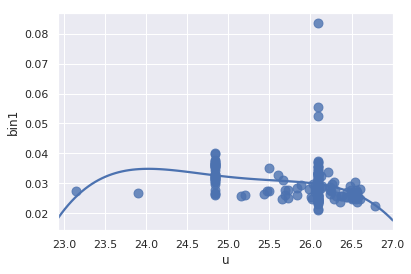

In [43]:
sns.regplot(x="u", y="bin1", data=df,
           order=4, ci=None, scatter_kws={"s": 80});

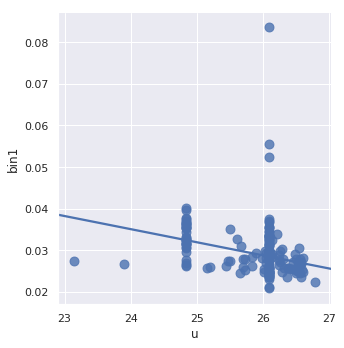

In [28]:
#Trying out robust regression
sns.lmplot(x="u", y="bin1", data=df,
           robust=True, ci=None, scatter_kws={"s": 80});

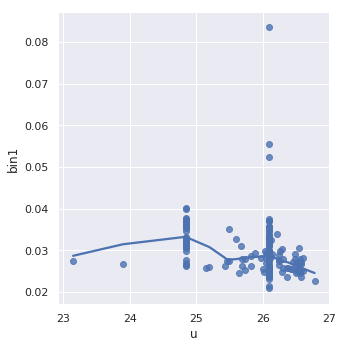

In [30]:
sns.lmplot(x="u", y="bin1", data=df,
           lowess=True);

## First Step to Deep Learning - Training and Validation set

In [54]:
import sklearn
photobins = df
data = photobins.bin1
target = photobins.u

In [55]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, 
                                                    target, 
                                                    shuffle=True,
                                                    test_size=0.2, 
                                                    random_state=15)

In [65]:
y_test

72     25.20
48     26.24
107    24.84
30     26.09
25     26.09
123    26.09
97     24.84
134    26.09
89     26.03
137    26.09
58     26.36
109    24.84
112    24.84
130    26.09
31     26.13
74     26.57
110    24.84
6      26.09
47     25.44
92     24.84
59     25.47
148    26.09
26     26.09
68     25.89
57     26.60
124    26.09
61     26.57
117    24.84
80     26.05
141    26.09
55     26.49
Name: u, dtype: float64

In [83]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = sklearn.metrics.mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [85]:
lr = sklearn.linear_model.LinearRegression(fit_intercept=True)
#array.reshape(-1, 1)

#X_test.reshape(-1,1)
newXtest = X_test.values.reshape(-1,1)
#y_test.reshape(-1,1)
newytest = y_test.values.reshape(-1,1)


#X_train.reshape(-1,1)
newXtrain = X_train.values.reshape(-1,1)
#y_train.reshape(-1,1)
newytrain = y_train.values.reshape(-1,1)

train_error, test_error = calc_metrics(newXtrain, newytrain, newXtest, newytest, lr)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 0.395 | test error: 0.321
train/test: 0.8


Interesting to see that train error is larger than test error, but not much

In [92]:
# intermediate/test split (gives us test set)
X_intermediate, X_test, y_intermediate, y_test = sklearn.model_selection.train_test_split(data, 
                                                                  target, 
                                                                  shuffle=True,
                                                                  test_size=0.2, 
                                                                  random_state=15)

# train/validation split (gives us train and validation sets)
X_train, X_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X_intermediate,
                                                                y_intermediate,
                                                                shuffle=False,
                                                                test_size=0.25,
                                                                random_state=2018)
newXtest = X_test.values.reshape(-1,1)
newytest = y_test.values.reshape(-1,1)

newXtrain = X_train.values.reshape(-1,1)
newytrain = y_train.values.reshape(-1,1)

newXvalid = X_validation.values.reshape(-1,1)
newyvalid = y_validation.values.reshape(-1,1)


In [93]:
# delete intermediate variables
del X_intermediate, y_intermediate

# print proportions
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(target),2),
                                                       round(len(y_validation)/len(target),2),
                                                       round(len(y_test)/len(target),2)))

train: 0.6% | validation: 0.2% | test 0.2%


In [96]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    ridge = sklearn.linear_model.Ridge(alpha=alpha, fit_intercept=True, random_state=99)
#     ridge.fit(X_train, y_train)
    ridge.fit(newXtrain, newytrain)

    # calculate errors
    new_train_error = sklearn.metrics.mean_squared_error(newXtrain, ridge.predict(newXtrain))
    new_validation_error = sklearn.metrics.mean_squared_error(newyvalid, ridge.predict(newXvalid))
    new_test_error = sklearn.metrics.mean_squared_error(newytest, ridge.predict(newXtest))
    # print errors as report
    print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
          format(alpha,
                 round(new_train_error,4),
                 round(new_validation_error,4),
                 round(new_test_error,4)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 666.7752 | val error: 0.5253 | test error: 0.329
alpha:    0.01 | train error: 666.7638 | val error: 0.5358 | test error: 0.344
alpha:     0.1 | train error: 666.7611 | val error: 0.5431 | test error: 0.3555
alpha:       1 | train error: 666.761 | val error: 0.5443 | test error: 0.3574
alpha:      10 | train error: 666.761 | val error: 0.5444 | test error: 0.3576


??

## Let's try using our standard linear regression models and inspect our data

In [99]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

#read in the entire house dataset,

#outputs the no of rows and columns in the dataset,
print('=> The number of rows and columns in our dataset is (rows, columns):')
print(df.shape,'\n')

#outputs the summary statistics and info,
print('\n=> These are the summary statistics for a sample of the columns:\n')
print(df.iloc[:,6:].describe())
print('\n=> These are the info for a sample of the columns:\n')
print(df.iloc[:,6:14].info())

=> The number of rows and columns in our dataset is (rows, columns):
(155, 15) 


=> These are the summary statistics for a sample of the columns:

             bin1        bin2        bin3        bin4        bin5        bin6  \
count  155.000000  155.000000  155.000000  155.000000  155.000000  155.000000   
mean     0.029931    0.021713    0.025183    0.037259    0.042666    0.046093   
std      0.006668    0.005308    0.006714    0.008544    0.017432    0.025550   
min      0.021000    0.015500    0.016700    0.023700    0.029900    0.029100   
25%      0.025800    0.018400    0.020550    0.030550    0.034300    0.034650   
50%      0.028400    0.020600    0.023300    0.035800    0.037200    0.040400   
75%      0.032700    0.023900    0.028750    0.041050    0.047450    0.050750   
max      0.083600    0.053800    0.065000    0.067100    0.221500    0.288200   

             bin7        bin8        bin9  
count  155.000000  155.000000  155.000000  
mean     0.045997    0.093086    0

Strip plotting parts of data - how are photometric redshifts is spread out in relation to it’s own bin

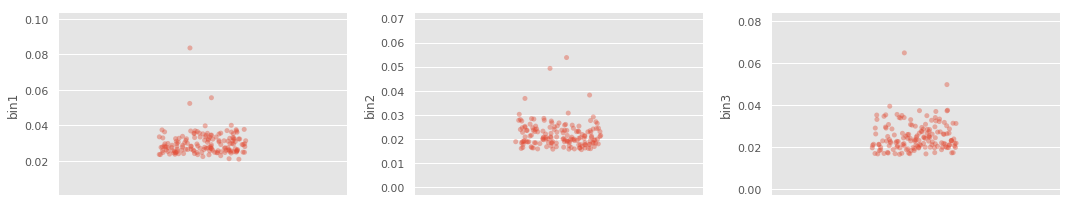

In [100]:
sample_df = df[['bin1', 'bin2','bin3']]
plt.figure(figsize=(15, 3))

#function for plotting stripplots given a dataframe
def stripplot_these(df):
    for idx, name in enumerate(df.columns):
        n = idx + 1
        plt.subplot(1,3,n)
        sns.stripplot(x=name, data=df, jitter=0.15, orient= 'v', alpha=.4)
    plt.tight_layout()
    plt.show()

stripplot_these(sample_df)

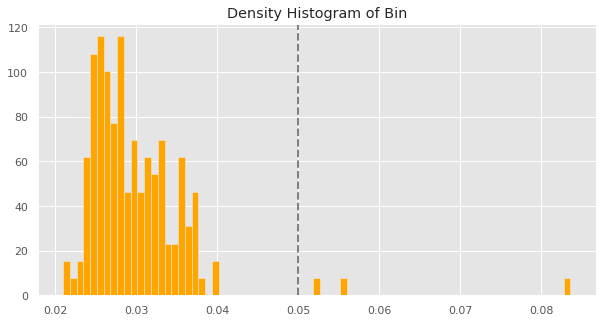

In [103]:
mu = df.bin1.mean()
sd = df.bin1.std()
li = mu + 3 * sd
plt.figure(figsize=(10, 5))
plt.title('Density Histogram of Bin')
plt.hist(df.bin1, bins=75,density=True,color='orange')
plt.axvline(li, color='grey', linestyle='dashed', linewidth=2)
plt.show()

How are the bins correlated with each other?

In [110]:
col_names = ['u','bin1', 'bin2', 'bin3', 'bin4', 'bin5','bin6','bin7','bin8', 'bin9']
new_df =  df[col_names]

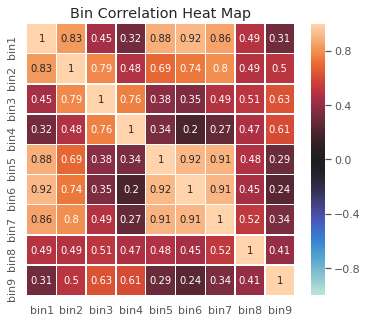

In [112]:
#We are inspecting the u filter here
features = new_df.loc[:,new_df.columns != 'u']
targets = new_df.loc[:,new_df.columns == 'u']

#creating pairwise correlation of columns using Pearson's R,
corr = features.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Bin Correlation Heat Map')
plt.show()

In [115]:
from sklearn.model_selection import train_test_split, cross_val_score

#splitting our dataset randomly with the test data containing 10% of the data,
X_train, X_test, y_train, y_test = train_test_split(features,targets, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [116]:
import sklearn.metrics
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [117]:
#fitting the training data to the model,
reg_model.fit(X_train, y_train)

#outputs the coefficients
print('Intercept :', reg_model.intercept_[0], '\n')
print(pd.DataFrame({'features':X_train.columns,'coeficients':reg_model.coef_[0]}))

Intercept : 26.66420289975741 

  features  coeficients
0     bin1    23.932812
1     bin2    81.270677
2     bin3  -105.361903
3     bin4    24.692915
4     bin5   -73.867635
5     bin6   -15.714138
6     bin7    47.432399
7     bin8     1.720149
8     bin9    -0.220215


How good really is this data? Let's inspect R-square values

In [118]:
print("Training set score: {:.2f}".format(reg_model.score(X_train, y_train)))


Training set score: 0.67


In [119]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = LinearRegression()
cv_scores = cross_val_score(cv_reg_model, features, targets,cv=10, scoring='r2')

#outputs the scores
print('Cross Validation scores: {}'.format(cv_scores))
print("\nAverage 10-Fold CV Score: {}".format(np.mean(cv_scores)))

Cross Validation scores: [-1.34376245e+01 -1.41593321e+03  4.39344359e-01  4.62859700e-01
  6.99748423e-01  7.94916200e-01 -4.19896221e+27  2.20405530e-01
 -8.92471455e+26 -5.92743319e+26]

Average 10-Fold CV Score: -5.6841769860049675e+26


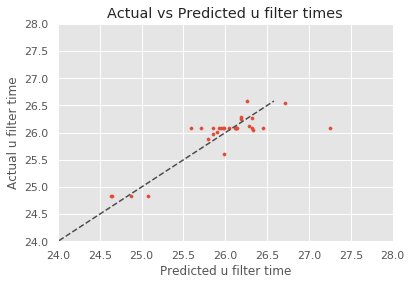

In [125]:
y_pred = reg_model.predict(X_test)

y_pred_a = pd.DataFrame(y_pred)
y_test_a = y_test.reset_index(drop=True, inplace=False)
pred_act_df = pd.concat([y_test_a,y_pred_a], axis=1).sort_values(1,axis=1).reset_index(drop=True)

#output samples of our predicted values
#plt.figure(figsize=(6, 6))
#maxlimit = pred_act_df['u'].max()
plt.xlim(24, 28)
plt.ylim(24, 28)
plt.scatter(pred_act_df[0], pred_act_df['u'], s=10)
plt.xlabel('Predicted u filter time')
plt.ylabel('Actual u filter time')
plt.plot([-1,maxlimit], [-1,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted u filter times')
plt.show()

In [127]:
import statsmodels.api as sm 

#training the OLS algorithm and outputting the summary statistics
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
print(sm_model.summary())
print(sm_model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                      u   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     26.10
Date:                Fri, 31 May 2019   Prob (F-statistic):           7.22e-24
Time:                        06:46:20   Log-Likelihood:                -56.570
No. Observations:                 124   AIC:                             133.1
Df Residuals:                     114   BIC:                             161.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.6642      0.293     91.057      0.0

/home/kinimv/apps/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
